# [Loading and normalizing datasets](https://learn.microsoft.com/en-us/training/modules/intro-machine-learning-pytorch/3-data)

Pytorch에서 제공하는 Data 로드 모듈
- `torch.utils.data.Dataset`
- `torch.utils.data.DataLoader`

# 1.Datasets and Dataloaders

## [FashionMNIST](https://github.com/mpalaourg/FashionMNIST-PyTorch)

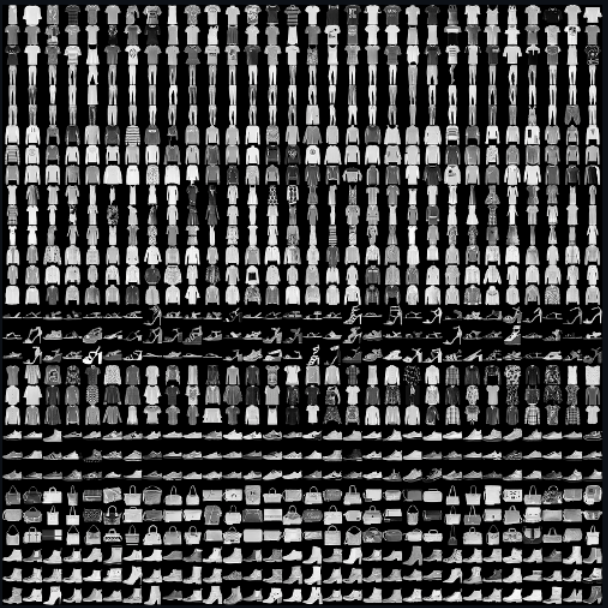

- 28 x 28 grayscale image
- 60,000 training examples / 10,000 test examples
- 10 Labels
    - T-shirt/top
    - Trouser
    - Pullover
    - Dress
    - Coat
    - Sandal
    - Shirt
    - Sneaker
    - Bag
    - Ankle boot

In [59]:
%matplotlib inline
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data", # path where the data is stored
    train=True, # specifies training or test dataset
    download=True, # downloads the from the Internet if it's not avaliable at root.
    # transform=ToTensor() # specify the feature and label transformations
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [60]:
type(training_data), type(test_data)

(torchvision.datasets.mnist.FashionMNIST,
 torchvision.datasets.mnist.FashionMNIST)

In [61]:
len(training_data), len(test_data)

(60000, 10000)

In [62]:
torch.randint(len(training_data), size=(1,2,3))

tensor([[[58541, 38569, 15495],
         [42047, 34547, 50901]]])

In [63]:
torch.randint(len(training_data), size=(1,))

tensor([39314])

In [64]:
torch.randint(len(training_data), size=(1,)).item()

24049

In [65]:
training_data[6375]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F65DA1624C0>, 3)

In [78]:
import numpy as np 

np.array(training_data[6375][0])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  17, 143,  40,   0,
          0,   0,   0,  90, 110,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1, 190, 214, 213,
        128, 174, 193, 227, 153,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 167, 186, 174,
        206, 193, 231, 217, 138,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  13, 233, 222, 207,
        181, 156, 228, 231, 219,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 121, 244, 223, 237,
        246, 247, 230, 224, 245,  89,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 237, 234, 228, 226,
        227, 226, 231, 227, 240, 197,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [77]:
np.array(training_data[6375][0]).shape

(28, 28)

In [69]:
training_data[6375][1] # 정답

3

## Iterating and Visualizing the Dataset

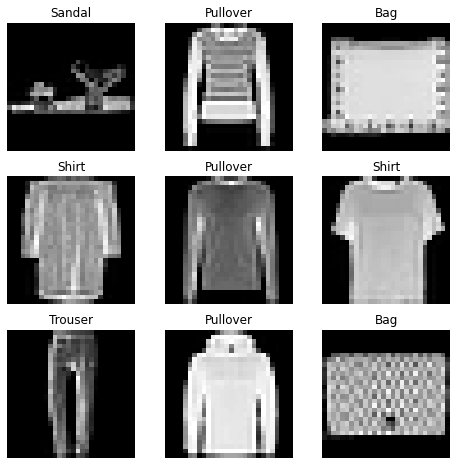

In [81]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img, cmap="gray")
plt.show()

## Preparing your data for training with DataLoaders

In [84]:
from torch.utils.data import DataLoader

test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## Iterate through the DataLoader

In [85]:
# Display image and label.
test_features, test_labels = next(iter(test_dataloader))
print(f"Feature batch shape: {test_features.size()}")
print(f"Labels batch shape: {test_labels.size()}")

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


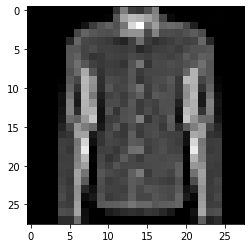

Label: 6


In [86]:
img = test_features[0].squeeze()
label = test_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# 2.Normalization(정규화)

- 값의 범위(scale)을 0-1 사이로 변경
- 학습 전에 scaling하는 이유
    - 머신러닝에서 scale이 큰 feature의 영향이 비대해지는 것을 방지
    - 딥러닝에서 Loacal Minima에 빠질 위험 감소(학습 속도 향상)

## 비정규화

In [87]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds1 = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True
)

In [88]:
ds_features, ds_label = ds1[1]

In [89]:
np.array(ds_features)

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [90]:
ds_label

0

## 정규화

In [93]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds2 = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(), # Features 정규화 
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)) # target 정규화 
)

In [94]:
ds_feautres, ds_label = ds2[1]

In [95]:
ds_feautres

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
          0.0000, 0.0000, 0.1608, 0.7373, 0.4039, 0.2118, 0.1882, 0.1686,
          0.3412, 0.6588, 0.5216, 0.0627, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.1922,
          0.5333, 0.8588, 0.8471, 0.8941, 0.9255, 1.0000, 1.0000, 1.0000,
          1.0000, 0.8510, 0.8431, 0.9961, 0.9059, 0.6275, 0.1765, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.6902, 0.8706,
          0.8784, 0.8314, 0.7961, 0.7765, 0.7686, 0.7843, 0.8431, 0.8000,
          0.7922, 0.7882, 0.7882, 0.7882, 0.8196, 0.8549, 0.8784, 0.6431,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7373, 0.8588, 0.7843,
          0.7765, 0.7922, 0.7765, 0.7804, 0.7804, 0.7882, 0.7686, 0.7765,
          0.7765, 0.7843, 0.7843, 0.7843, 0.7843, 0.7882,

In [96]:
ds_label

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])